<div style="background: linear-gradient(90deg, #6a040f, #d00000); padding: 30px;  border-radius:15px; text-align: center;">
  <h1 style="color: white; font-size: 48px; font-weight: bold; margin: 0; font-family: Arial, sans-serif;">
    AI-Driven Telecom Churn Forecasting
  </h1>

</div>

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 1. Introduction    </b></div>

## About Dataset
This dataset, sourced from Kaggle, includes a CSV file containing telecom customer data. It is used to predict customer churn for a telecom company and to enhance the model's prediction accuracy using the provided data.  [Dataset Link](https://www.kaggle.com/code/sahilnbajaj/telecom-customer-churn-prediction/input)


## Business Problem

1) Customer Churn Prediction
2) Pricing Strategy Analysis
3) Optimizing Product Bundles


## Analytical Approach

Our analytic approach focuses on developing a predictive model to predict churn prediction for telecom companny is going to occur or not. We will analyze churn data, perform data preprocessing, feature engineering, and test various machine learning algorithms. We also used Artificial Neural Network(ANN) to increase overall accuracy.

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 2. Importing Required Libraries   </b></div>

In [1]:
# 📦 Basic Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ⚠️ Warnings Control
import warnings
warnings.filterwarnings('ignore')

# 🧪 Model Selection
from sklearn.model_selection import train_test_split,RandomizedSearchCV

# ⚙️ Preprocessing
from sklearn.preprocessing import StandardScaler,FunctionTransformer, PowerTransformer

# Encoding
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# 🤖 Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# 🧠 Artificial Neural Networks (ANN)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# 📊 Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2025-07-06 12:16:31.164947: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751804191.451485      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751804191.525850      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 3. Reading and Understanding our Data   </b></div>

## How data look like

In [2]:
df = pd.read_csv('/kaggle/input/telco1/telco.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


customerID: Unique identifier for each customer.

gender: Customer’s gender (e.g., Male, Female).

SeniorCitizen: Indicates if the customer is a senior citizen (1 = Yes, 0 = No).

Partner: Whether the customer has a partner (Yes or No).

Dependents: Whether the customer has dependents (Yes or No).

tenure: Number of months the customer has been with the company.

PhoneService: Whether the customer has phone service (Yes or No).

MultipleLines: Whether the customer has multiple phone lines.

InternetService: Type of internet service (DSL, Fiber optic, or No).

OnlineSecurity: Whether the customer has online security add-on.

OnlineBackup: Whether the customer has online backup add-on.

DeviceProtection: Whether the customer has device protection add-on.

TechSupport: Whether the customer has tech support add-on.

StreamingTV: Whether the customer has streaming TV service.

StreamingMovies: Whether the customer has streaming movies service.

Contract: Type of contract (Month-to-month, One year, Two year).

PaperlessBilling: Whether the customer uses paperless billing.

PaymentMethod: Method of payment (e.g., Electronic check, Mailed check).

MonthlyCharges: The amount charged to the customer monthly.

TotalCharges: Total amount charged to the customer.

Churn: Whether the customer has left the company (Yes or No).

-- Yes means the customer has left the company (they churned).

-- No means the customer is still with the company (they did not churn).

In [3]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Shape of data


In [4]:
df.shape

(7043, 21)

## Check duplicate value

In [5]:
df.duplicated().sum()

0

## Check null values in data

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Detail of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## No of Unique Values

In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
# PandasProfiling

# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title='Profiling Report Before Cleaning')
# profile

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 4. EDA </b></div>

### 1. What is the distribution of customer tenure, and how does tenure relate to churn?

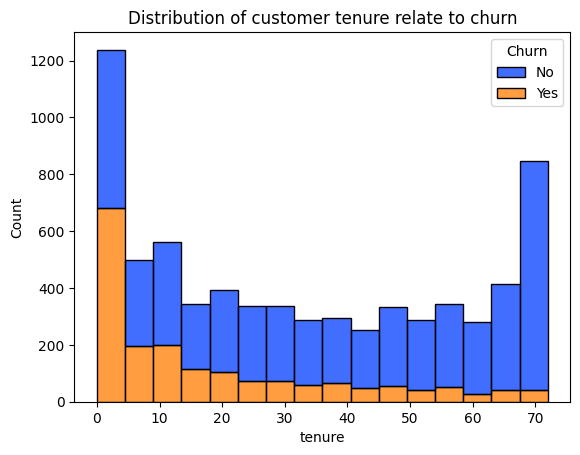

In [10]:
sns.histplot(data=df,x='tenure',hue='Churn', multiple='stack',palette='bright')
plt.title('Distribution of customer tenure relate to churn')
plt.show()

### 2. Distribution of gender or SeniorCitizen?

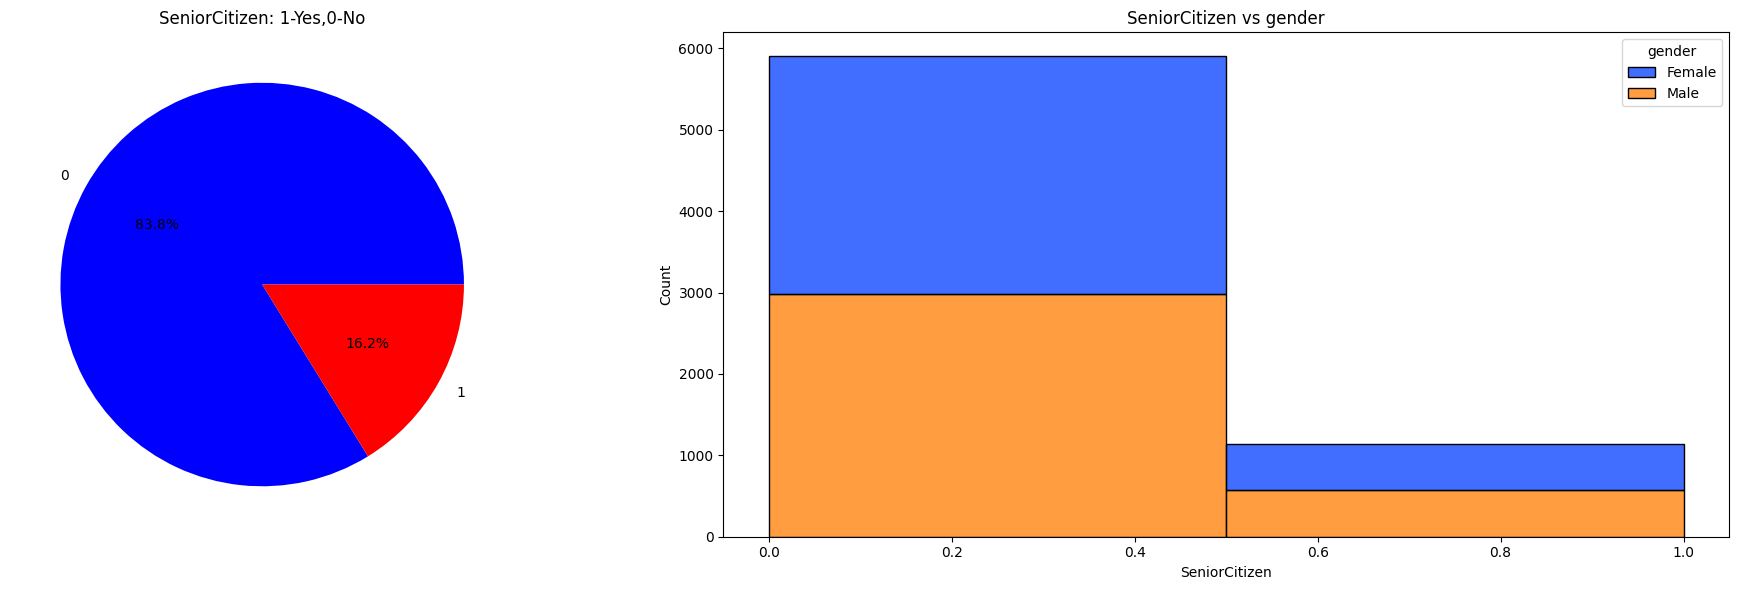

In [11]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
count = df['SeniorCitizen'].value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f%%',colors='bright')
plt.title('SeniorCitizen: 1-Yes,0-No')

plt.subplot(1, 2, 2)
sns.histplot(x=df['SeniorCitizen'],hue=df['gender'],multiple='stack',palette='bright',bins=2)
plt.title('SeniorCitizen vs gender')


plt.tight_layout()
plt.show()

### 3. How do different contract types (e.g., month-to-month, one-year, two-year) impact churn rates?

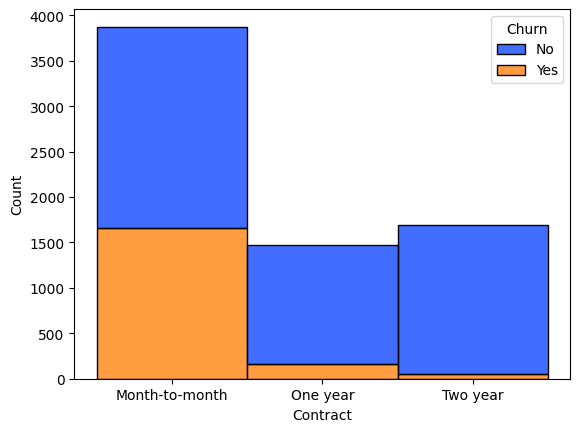

In [12]:
df['Contract'].value_counts()

sns.histplot(x=df['Contract'],hue=df['Churn'], multiple='stack',palette='bright')
plt.show()

### 4. What is the relationship between monthly charges and churn?

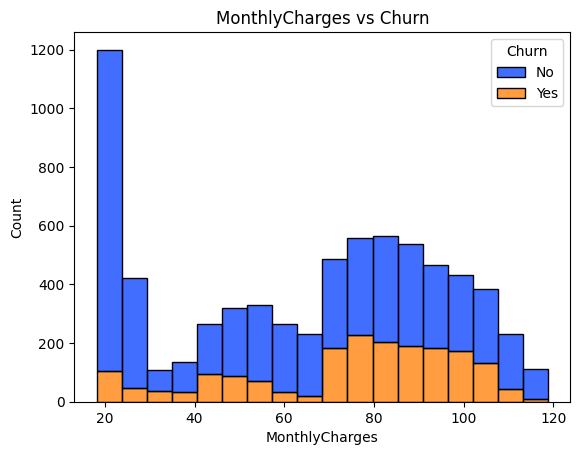

In [13]:
sns.histplot(x=df['MonthlyCharges'],hue=df['Churn'], multiple='stack',palette='bright')
plt.title('MonthlyCharges vs Churn')
plt.show()

### Churn Hotspots:

1) 70–100: Highest churn – Competition issue.
2) 100–120: Premium churn – Indicating critical peak
3) <40: Minor churn peak – possibly low-margin but Commitment users.

### Suggestion:
1) Incremental price rises (e.g., 1-2 annually) tied to visible minor feature additions.
2) Revalue the most churned charges price.
3) For high value charges give special discount need extra managment.
4) Split this problematic tier.Create a new tier from 70 - 100 give more features and reduce features below 60.
5) After A/B testing find the optimal balance between 70-110.

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 5. Data Preprocessing </b></div>

In [14]:
# remove customerID it's has values
df = df.drop(columns='customerID',axis=1)

# TotalCharges dtype change str to float
df['TotalCharges'].replace(' ',None,inplace=True)
df.dropna(subset=['TotalCharges'],inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [15]:
# for numerical data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


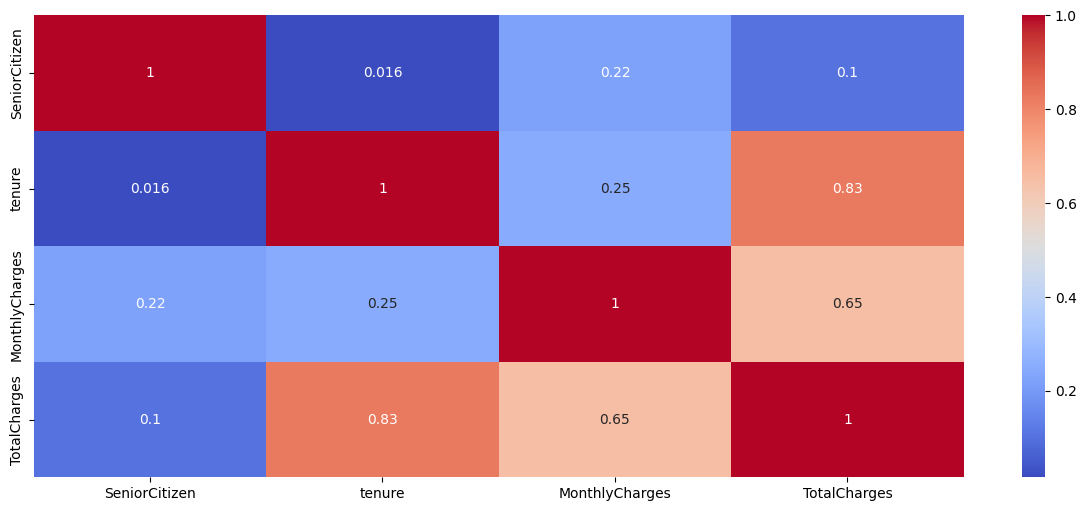

In [16]:
plt.figure(figsize=(15,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [17]:
# Nominal data

# 1) gender 
df['gender'] = df['gender'].map({'Male':1,'Female':0})

# 2) Partner 
df['Partner'] = df['Partner'].map({'Yes':1,'No':0})

# 3) Dependents`
df['Dependents'] = df['Dependents'].map({'Yes':1,'No':0})

# 4) PhoneService
df['PhoneService'] = df['PhoneService'].map({'Yes':1,'No':0})

# 5) PaperlessBilling
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1,'No':0})

# 6) Churn
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})


# Ordinal data
encode = OrdinalEncoder(categories=[['Month-to-month','Two year','One year']])

# 1) Contract
df['Contract'] = encode.fit_transform(df[['Contract']])

In [18]:
# Nominal Encoding by using get_dummies
df = pd.get_dummies(df,columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod'],drop_first=True).astype(int)

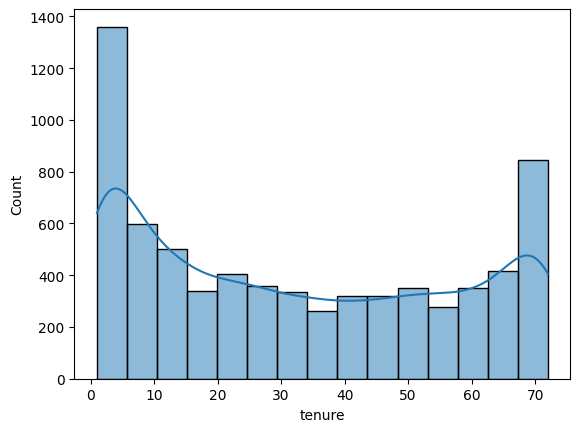

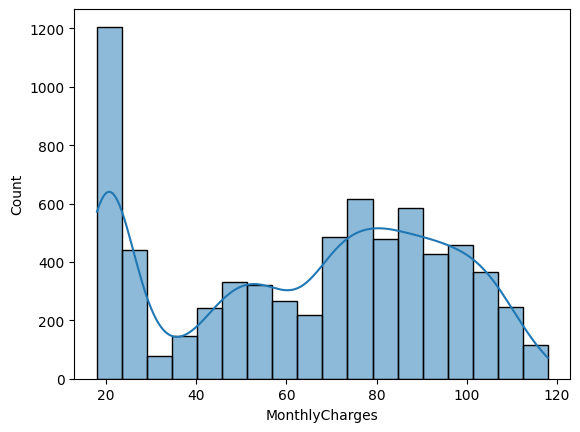

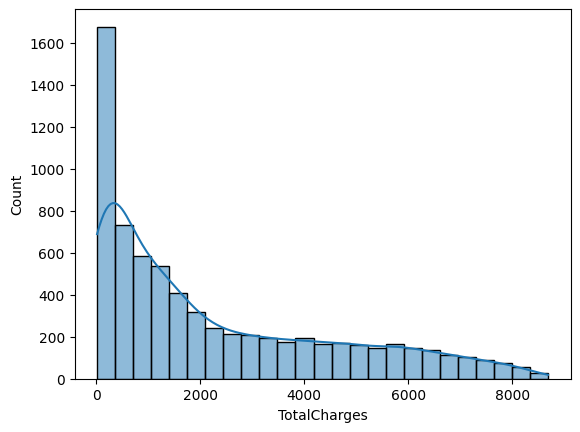

In [19]:
# these three columns are numerical columns
data = ['tenure','MonthlyCharges','TotalCharges']
def show_visual(data):
    for i in data:
        sns.histplot(data=df[i],kde=True,palette='bright')
        plt.show()
show_visual(data)

In [20]:
data = ['tenure','MonthlyCharges','TotalCharges']
for i in data:
    print(f'{i}: {df[i].skew()}')

# monthlycharges and tenure both columns are slightly left skew but are also normalise form we have to apply transformation on TotalCharges
# others column are categorical that convert it into numerical

tenure: 0.23773083190513133
MonthlyCharges: -0.2217423057865522
TotalCharges: 0.9616359547864703


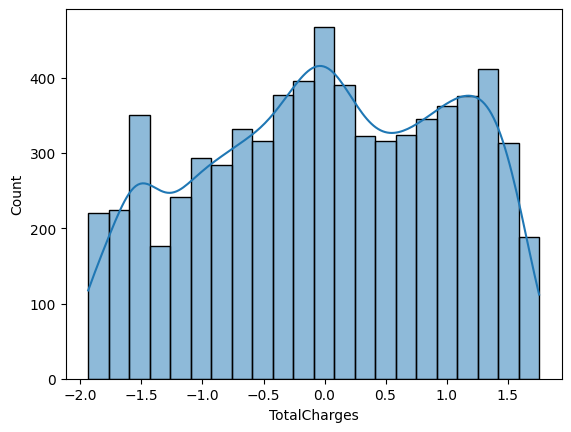

In [21]:
# func_trans = FunctionTransformer(func=np.log1p) not giving good result
# we use powertransformer to transform the data we can also used for right skew data

pt = PowerTransformer(method='yeo-johnson')
df['TotalCharges'] = pt.fit_transform(df[['TotalCharges']])

sns.histplot(df,x=df['TotalCharges'],kde=True)
plt.show()

In [22]:
print(f"TotalCharges: {df['TotalCharges'].skew()}")

TotalCharges: -0.14515915085779646


##### Initially is churn rate are high but after increase in tenure churn rate decrease as of increasing tenure

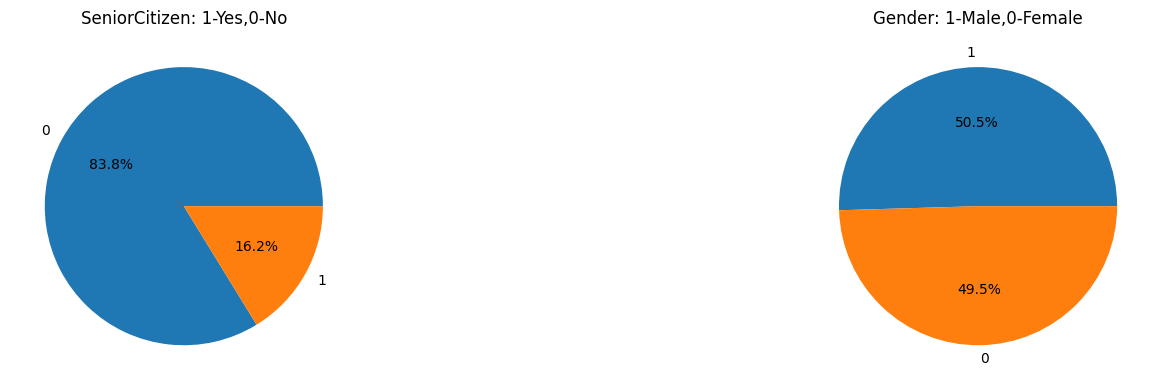

Gender Churn:
0: 27 %
1: 26 %
SeniorCitizen Churn:
0: 24 %
1: 42 %


In [23]:
plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
count = df['SeniorCitizen'].value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.title('SeniorCitizen: 1-Yes,0-No')

plt.subplot(1, 2, 2)
count = df['gender'].value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.title('Gender: 1-Male,0-Female')


plt.tight_layout()
plt.show()

gender_churn = df.groupby('gender')['Churn'].mean() * 100
senior_churn = df.groupby('SeniorCitizen')['Churn'].mean() * 100

print('Gender Churn:')
for idx,val in enumerate(gender_churn):
    print(f'{idx}: {round(val)} %')

print('SeniorCitizen Churn:')
for idx,val in enumerate(senior_churn):
    print(f'{idx}: {round(val)} %')

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 6. Train Test Split </b></div>

In [24]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,29,-1.814808,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,2,0,56,0.254158,...,1,0,0,0,0,0,0,0,0,1


In [25]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 7. ANN </b></div>

In [26]:
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=29))
#model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

adam = Adam()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(
    monitor="val_loss", # The training will stop when the monitored quantity (here, validation loss) has stopped improving.
    patience=0, # training stops immediately when there's no improvement.
    mode="auto", # determine whether the metric is improving.
    restore_best_weights=True, # After stopping, the model weights are rolled back to the best epoch.
    start_from_epoch=0 #  Ignore the first few epochs where the metric may be unstable.
)

history = model.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test),verbose=1,callbacks=callback)

Epoch 1/100


2025-07-06 12:16:51.991256: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7500 - loss: 0.4976 - val_accuracy: 0.7854 - val_loss: 0.4445
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8169 - loss: 0.4102 - val_accuracy: 0.7832 - val_loss: 0.4402
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8147 - loss: 0.3974 - val_accuracy: 0.7811 - val_loss: 0.4474


<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 8. Modeling </b></div>

In [27]:
# import algorithmn

lg = LogisticRegression()
nb = GaussianNB()
svc = SVC(probability=True)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()
adc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb1 = xgb.XGBClassifier()

In [28]:
model_list = [lg, nb, svc, dtc, rfc, knc, adc, gbc,xgb1]

def model_predict(model_list):
    Algorithmn = []
    Accuracy = []
    for i in model_list:
        i.fit(X_train_scaled, y_train) 
        y_pred = i.predict(X_test_scaled)  
        acc = accuracy_score(y_test, y_pred)
        Algorithmn.append(type(i).__name__)
        Accuracy.append(float(f"{round(acc,8)*100}"))
        
    return pd.DataFrame({'Algorithmn': Algorithmn, 'Accuracy': Accuracy})
result = model_predict(model_list)
result

,Algorithmn,Accuracy
0,LogisticRegression,79.175551
1,GaussianNB,64.534471
2,SVC,78.464819
3,DecisionTreeClassifier,72.921109
4,RandomForestClassifier,78.891258
5,KNeighborsClassifier,75.053305
6,AdaBoostClassifier,79.459844
7,GradientBoostingClassifier,79.459844
8,XGBClassifier,76.972281


<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 9. ROC_AUC Curve  </b></div>

In [29]:
# ROC_AUC Curve

y_scores = adc.predict_proba(X_test_scaled)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

optimal_idx = np.argmax(tpr - fpr) # This statistic helps you find the point on the ROC curve that is farthest from the diagonal line,
                                    # which ideally indicates the best trade-off between true positives and false positives.
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold is: {round(optimal_threshold*100)}%")

Optimal threshold is: 49%


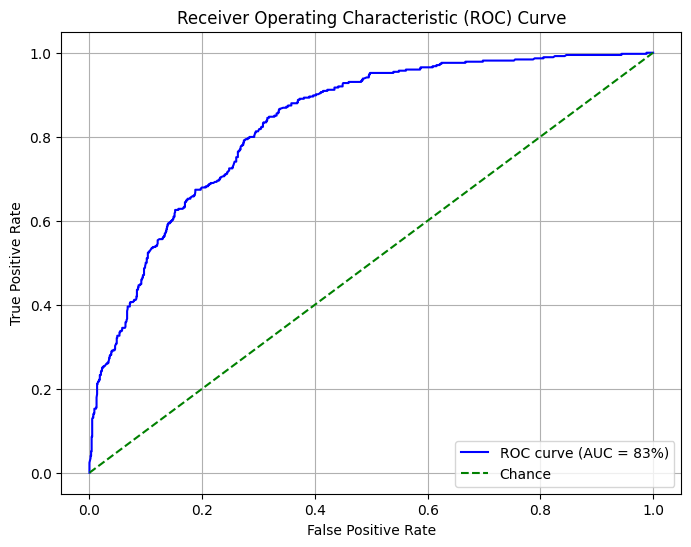

In [30]:
from sklearn.metrics import auc

# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {round(roc_auc*100)}%)')
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='Chance')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 10. RandomizedSearchCV </b></div>

### AdaBoostClassifier

In [31]:
param_distribution = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3, 4]
    
}
base_est = DecisionTreeClassifier()
adc = AdaBoostClassifier(estimator=base_est)

random_search_adc = RandomizedSearchCV(estimator=adc, param_distributions=param_distribution, cv=5, 
                           scoring='accuracy', verbose=0, n_jobs=-1,random_state=42)

random_search_adc.fit(X_train_scaled,y_train)
y_pred = random_search_adc.predict(X_test_scaled)
acc = accuracy_score(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'ba

RandomizedSearchCV Score: 0.7924662402274343
RandomizedSearchCV: {'n_estimators': 200, 'learning_rate': 1.0, 'base_estimator__max_depth': 1}
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



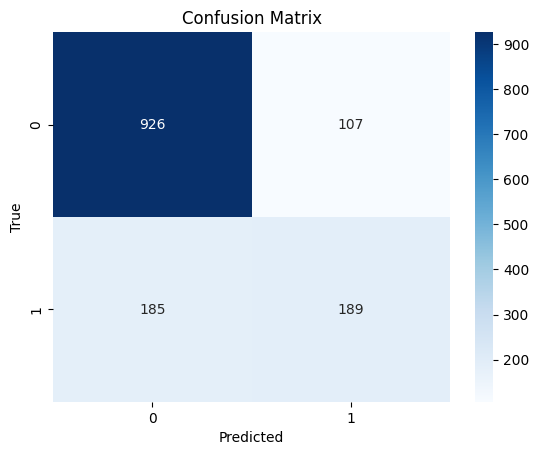

In [32]:
print(f'RandomizedSearchCV Score: {acc}')
print(f'RandomizedSearchCV: {random_search_adc.best_params_}')


# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### GradientBoostingClassifier

In [33]:
param_distribution = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

gbc = GradientBoostingClassifier()


random_search_gbc = RandomizedSearchCV(estimator=gbc,param_distributions=param_distribution,cv=5,
                                       scoring='accuracy',n_jobs=-1,random_state=42)

random_search_gbc.fit(X_train_scaled,y_train)
y_pred = random_search_gbc.predict(X_test_scaled)
acc = accuracy_score(y_test,y_pred)

RandomizedSearchCV Score: 0.7938877043354655
RandomizedSearchCV Score: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.01}
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



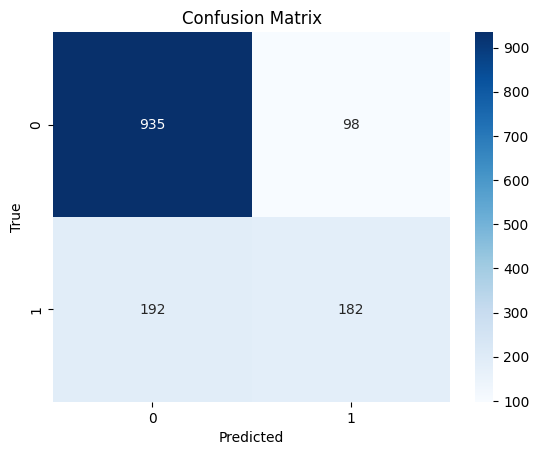

In [34]:
print(f'RandomizedSearchCV Score: {acc}')
print(f'RandomizedSearchCV Score: {random_search_gbc.best_params_}')

# Classification Report
print('Classification Report:')
print(classification_report(y_test,y_pred))

# Plot confusion matrix with the customized colormap
ans = confusion_matrix(y_test,y_pred)
sns.heatmap(ans,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 11. Conclusion </b></div>

#### Choose between Gradientboost or Adaboost we have to focus on precision because we are working on classification project and both have same accuracy.  
1) 0 = Not Churn
2) 1 = Churn

-- From 1st model:
In actual 109 people stay with company but our model say 109 people left the company.

-- From 2nd model:
In actual 100 people stay with company but our model say 100 people left the company.

-- By  judging both the model we pick 2nd model i.e. Gradientboost

<div style="display: flex; justify-content: center;">
    <img src="https://i.giphy.com/gEP2k49ndOqJDBSPZl.webp" alt="GIF">
</div>